In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Read the file bluegills.txt. The seperator is tab
data = pd.read_csv('input/bluegills.txt', sep='\t')
data.head()

age  length
0    1      67
1    1      62
2    2     109
3    2      83
4    2      91

In [3]:
# Give the dimensions of the dataset
data.shape

(78, 2)

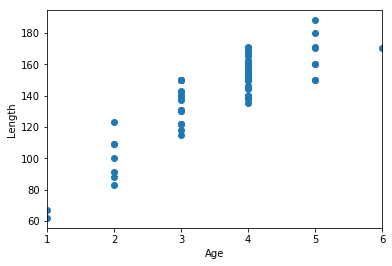

In [4]:
# Plot the length vs the age
plt.scatter(data['age'], data['length'])
plt.xlim([1, 6])
plt.xlabel('Age')
plt.ylabel('Length')

In [5]:
# First use Simple Linear Regression to predict the length

In [6]:
from sklearn.model_selection import train_test_split
X = data.drop('length',axis=1)
y = data['length']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [7]:
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [8]:
# First we are using LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

#To retrieve the intercept:
print("Intercept")
print(model.intercept_)
print()
#For retrieving the slope:
print("Slope")
print(model.coef_)
print()

Intercept
56.49491908167106

Slope
[23.68535943]



In [9]:
y_predict = model.predict(X_test)

MAE = metrics.mean_absolute_error(y_test,y_predict)
print('Mean Absolute Error: '+ str(MAE))
print()

MSE = metrics.mean_squared_error(y_test,y_predict)
print('Mean Squared Error: '+ str(MSE))
print()

RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error: '+ str(RMSE))
print()

r2 = metrics.r2_score(y_test,y_predict)
print('R square: ' + str(r2))  
print()

Mean Absolute Error: 9.45905469828127

Mean Squared Error: 140.63130743114854

Root Mean Squared Error: 11.858807167297584

R square: 0.546875916246614



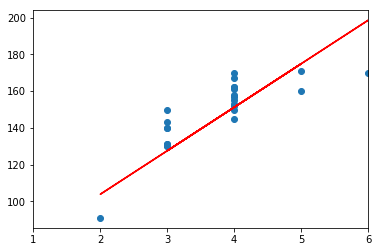

In [10]:
# Plot the dataset length vs age and the line
# First calculate the minimum and the maximumvalue for age

plt.scatter(X_test, y_test)
plt.plot(X_test, y_predict, color='red')
plt.xlim([1, 6])
plt.show()

In [11]:
# Now we are using Polynomial Regression. 
# This is still LinearRegression because the coefficients/weights associated with the features are still linear

In [12]:
poly = PolynomialFeatures(degree=8)
X_train_transform = poly.fit_transform(X_train)
X_test_transform = poly.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_transform,y_train)

#To retrieve the intercept:
print("Intercept")
print(model.intercept_)
print()
#For retrieving the coefficients:
print("Coefficients")
print(model.coef_)
print()


Intercept
57.26390223696342

Coefficients
[ 0.          0.60706015  1.48850352  2.4737915   2.86939466  1.34745543
 -2.08637603  0.5859995  -0.04973096]



In [13]:
y_predict = model.predict(X_test_transform)

MAE = metrics.mean_absolute_error(y_test,y_predict)
print('Mean Absolute Error: '+ str(MAE))
print()

MSE = metrics.mean_squared_error(y_test,y_predict)
print('Mean Squared Error: '+ str(MSE))
print()

RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error: '+ str(RMSE))
print()

mean = data['length'].mean()
print ('Mean: ' + str(mean))
print()

r2 = metrics.r2_score(y_test,y_predict)
print('R square: ' + str(r2))  
print()

Mean Absolute Error: 96.2790751557424

Mean Squared Error: 193234.5529850461

Root Mean Squared Error: 439.58452314093824

Mean: 143.60256410256412

R square: -621.6154856287042



In [14]:
# Calculate the result of the polynomial for a specific value of x
def p(x):
    result = model.intercept_
    for i in range(0, len(model.coef_)):
        result += model.coef_[i] * x**i 
    return result

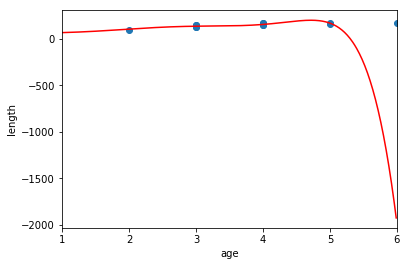

In [15]:
# Plot the dataset
plt.scatter(X_test, y_test)
plt.xlim([1, 6])
plt.xlabel('age')
plt.ylabel('length')

# Plot the polynomial
t1 = np.arange(1, 6, 0.01)
plt.plot(t1, p(t1), color='red')
plt.show()


In [16]:
# The Root Mean Squared Error is smaller for Polynomial Regression

In [17]:
# Use a for loop to create a model voor polynomials of degree = 1 .. 5 and to write out the root mean squared error

In [18]:
for i in range(1, 11):
    poly = PolynomialFeatures(degree=i)
    X_train_transform = poly.fit_transform(X_train)
    X_test_transform = poly.fit_transform(X_test)

    model = LinearRegression()
    model.fit(X_train_transform,y_train)
    
    y_predict = model.predict(X_test_transform)
    
    RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
    print('Root Mean Squared Error for i = ' + str(i) + ' is ' + str(RMSE))
    print()

Root Mean Squared Error for i = 1 is 11.858807167297584

Root Mean Squared Error for i = 2 is 8.236632584511613

Root Mean Squared Error for i = 3 is 8.368297063736415

Root Mean Squared Error for i = 4 is 9.983375594928253

Root Mean Squared Error for i = 5 is 10.555989637321543

Root Mean Squared Error for i = 6 is 9.973918663603612

Root Mean Squared Error for i = 7 is 86.10202282705795

Root Mean Squared Error for i = 8 is 439.58452314093824

Root Mean Squared Error for i = 9 is 1794.2082206432153

Root Mean Squared Error for i = 10 is 6582.078027642548

